In [1]:
#-- 리스트 8-1-(1), 20183421 박경식
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


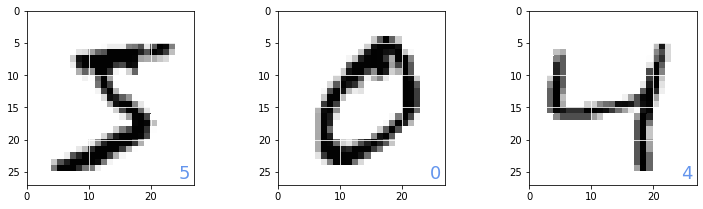

In [2]:
#-- 리스트 8-1-(2), 20183421 박경식
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

In [3]:
#-- 리스트 8-1-(3), 20183421 박경식
from keras.utils import np_utils


x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
#-- 리스트 8-1-(4), 20183421 박경식
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

In [5]:
#-- 리스트 8-1-(5), 20183421 박경식
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 7ms/step - loss: 2.0272 - accuracy: 0.4653 - val_loss: 1.7424 - val_accuracy: 0.6028
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 1.5687 - accuracy: 0.6571 - val_loss: 1.3984 - val_accuracy: 0.7168
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 1.2893 - accuracy: 0.7540 - val_loss: 1.1683 - val_accuracy: 0.8020
Epoch 4/10
60/60 [==============================] - 0s 5ms/step - loss: 1.0896 - accuracy: 0.8099 - val_loss: 0.9938 - val_accuracy: 0.8414
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.9333 - accuracy: 0.8422 - val_loss: 0.8536 - val_accuracy: 0.8623
Epoch 6/10
60/60 [==============================] - 0s 5ms/step - loss: 0.8075 - accuracy: 0.8611 - val_loss: 0.7410 - val_accuracy: 0.8743
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7080 - accuracy: 0.8730 - val_loss: 0.6529 - val_accuracy: 0.8832
Epoch 8/10
60/60 [==

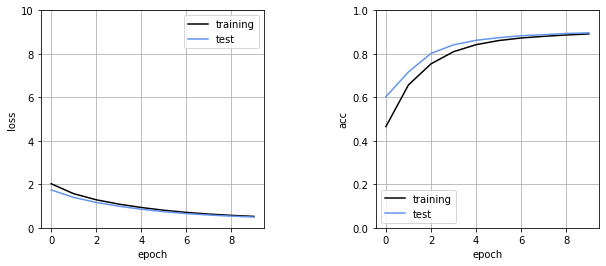

In [8]:
#-- 리스트 8-1-(6), 20183421 박경식
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

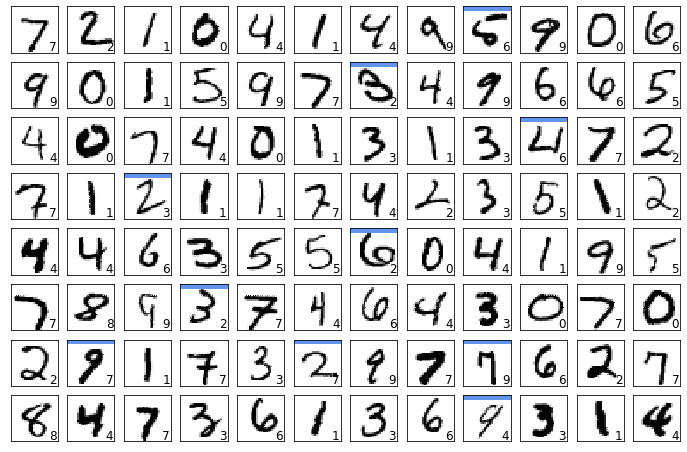

In [9]:
#-- 리스트 8-1-(7), 20183421 박경식
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

In [10]:
#-- 리스트 8-1-(8), 20183421 박경식
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 0s 6ms/step - loss: 1.5695 - accuracy: 0.5341 - val_loss: 0.9337 - val_accuracy: 0.7900
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.8396 - val_loss: 0.5181 - val_accuracy: 0.8791
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.4668 - accuracy: 0.8825 - val_loss: 0.3951 - val_accuracy: 0.9002
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.8980 - val_loss: 0.3420 - val_accuracy: 0.9085
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.9078 - val_loss: 0.3140 - val_accuracy: 0.9138
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3162 - accuracy: 0.9128 - val_loss: 0.2945 - val_accuracy: 0.9176
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.2980 - accuracy: 0.9172 - val_loss: 0.2815 - val_accuracy: 0.9205
Epoch 8/10
60/60 [==

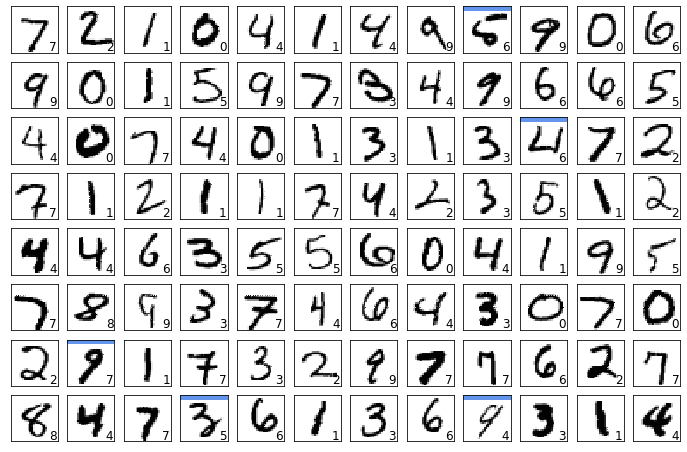

In [11]:
# 리스트 8-1-(9), 20183421 박경식
show_prediction()
plt.show()

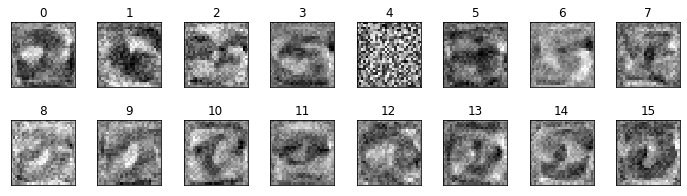

In [12]:
#-- 리스트 8-1-(10), 20183421 박경식
# 1층째의 무게 시각화
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [13]:
# 20183421 박경식
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [14]:
#-- 리스트 8-2-(1), 20183421 박경식
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

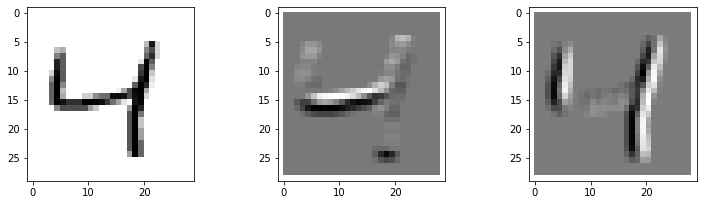

In [15]:
#-- 리스트 8-2-(2), 20183421 박경식
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [16]:
#-- 리스트 8-2-(3), 20183421 박경식
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu')) # (A)
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 5s 88ms/step - loss: 0.9504 - accuracy: 0.7877 - val_loss: 0.3631 - val_accuracy: 0.9016
Epoch 2/20
60/60 [==============================] - 5s 89ms/step - loss: 0.3098 - accuracy: 0.9131 - val_loss: 0.2461 - val_accuracy: 0.9322
Epoch 3/20
60/60 [==============================] - 5s 87ms/step - loss: 0.2249 - accuracy: 0.9364 - val_loss: 0.1879 - val_accuracy: 0.9482
Epoch 4/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1750 - accuracy: 0.9516 - val_loss: 0.1509 - val_accuracy: 0.9590
Epoch 5/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1425 - accuracy: 0.9605 - val_loss: 0.1279 - val_accuracy: 0.9659
Epoch 6/20
60/60 [==============================] - 5s 88ms/step - loss: 0.1202 - accuracy: 0.9673 - val_loss: 0.1126 - val_accuracy: 0.9688
Epoch 7/20
60/60 [==============================] - 5s 89ms/step - loss: 0.1038 - accuracy: 0.9719 - val_loss: 0.0993 - val_accuracy: 0.9723
Epoch 8/20
60

In [18]:
#-- 리스트 8-1-(7), 20183421 박경식
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

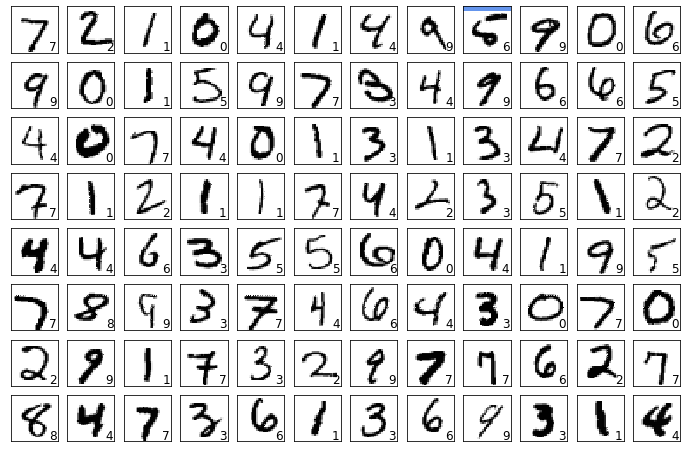

In [19]:
# 리스트 8-2-(4), 20183421 박경식
show_prediction()
plt.show()

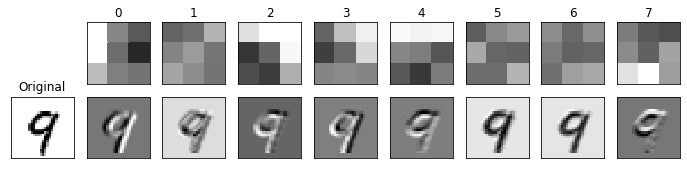

In [20]:
# 리스트 8-2-(5), 20183421 박경식
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [21]:
# 리스트 8-2-(6), 20183421 박경식
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 35s 585ms/step - loss: 0.7122 - accuracy: 0.7836 - val_loss: 0.1366 - val_accuracy: 0.9583
Epoch 2/20
60/60 [==============================] - 35s 576ms/step - loss: 0.1406 - accuracy: 0.9576 - val_loss: 0.0657 - val_accuracy: 0.9783
Epoch 3/20
60/60 [==============================] - 34s 570ms/step - loss: 0.0883 - accuracy: 0.9736 - val_loss: 0.0436 - val_accuracy: 0.9852
Epoch 4/20
60/60 [==============================] - 34s 571ms/step - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 5/20
60/60 [==============================] - 34s 568ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 6/20
60/60 [==============================] - 34s 569ms/step - loss: 0.0484 - accuracy: 0.9855 - val_loss: 0.0274 - val_accuracy: 0.9913
Epoch 7/20
60/60 [==============================] - 34s 573ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0264 - val_accuracy: 0.9909

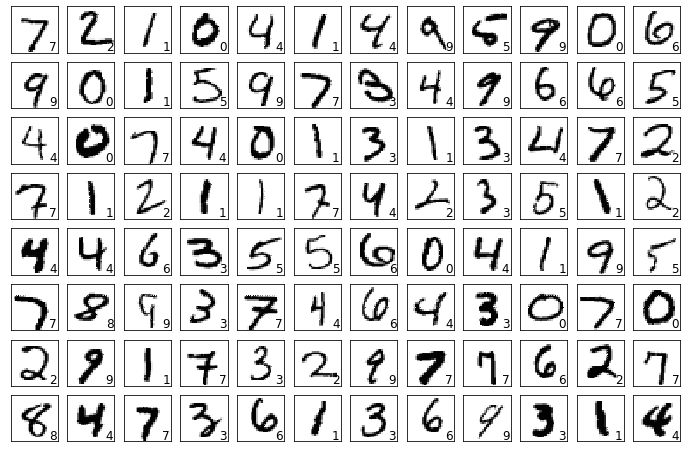

In [22]:
# 리스트 8-2-(7), 20183421 박경식
show_prediction()
plt.show()